In [1]:
import sys
import os

print("Current Working Directory:", os.getcwd())

# Add the examples directory to sys.path so we can import the set_random_seed function and other utilities from causal_helpers
examples_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'examples'))
sys.path.append(examples_dir)
# Now import set_random_seed directly from causal_helpers
from causal_helpers import set_random_seed
from cyclic_obs_data_generator import sample_er_dcg, sample_sf_dcg
from cyclic_obs_data_generator import sample_W, sample_data

# Add the data directory to sys.path so we can save and load data files
data_dir = os.path.abspath(os.path.join(examples_dir, '..', 'data'))

# Use the function
seed = 41 # main seed
set_random_seed(seed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/amine.mcharrak/pcax/examples
Current Working Directory: /home/amine.mcharrak/pcax/examples


In [2]:
# Example usage
num_samples = 4000
n_vars = 15
max_degree = 14
max_cycle = 5

# Generate data
#B = sample_er_dcg(n_vars=n_vars, max_degree=max_degree, max_cycle=max_cycle)
B = sample_sf_dcg(n_vars=n_vars, max_degree=max_degree, max_cycle=max_cycle)
print("B created")
W, noise_scales = sample_W(B)
print("W created")
#X = sample_data(B=B, noise_scales=noise_scales, num_samples=num_samples) # noise from uniform distribution**5
X = sample_data(B=B, noise_scales=noise_scales, num_samples=num_samples, softplus=True) # noise from softplus(normal(0,1))
print("X created")
data = pd.DataFrame(X, columns=[f"X{i}" for i in range(n_vars)])

# Display the adjacency matrix and a preview of the data
print("Adjacency Matrix:")
print(B)
print("\nGenerated Data:")
print(data.head())
print("\nTrue Weights:")
print(W)

B created
W created
X created
Adjacency Matrix:
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.]]

Generated Data:
          X0         X1         X2        X3        X4        X5        X6  \
0 -11.296861 -28.729516 -27.692496  7.440932 -1.137313  6.197034 -1.232434   
1  -9.138645 -22.702660 -21.414957  5.432507 -0.558103  4.

In [3]:
data.describe()

X0           X1           X2           X3           X4  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean    -10.196833   -24.933201   -23.960413     6.367158    -0.705869   
std       3.919239     9.522080     9.137259     2.450674     0.342822   
min     -28.940468   -70.393002   -67.577679     0.285126    -2.513039   
25%     -12.652357   -30.756772   -29.582023     4.605970    -0.908132   
50%      -9.780816   -23.919107   -23.002351     6.111483    -0.676150   
75%      -7.393896   -18.085267   -17.350103     7.885623    -0.471904   
max      -0.844086    -1.756104    -1.673567    18.007088     0.467798   

                X5           X6           X7           X8           X9  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      5.679662    -1.405782    -0.497893     3.442783   -15.719018   
std       2.159310     0.564499     0.288278     1.278706     6.011128   
min       0.304133    -4.054526    -1.668864     0.149139   -44.362372   
25%       4.137021    -1.753134    -0.669367     2.512304   -19.455019   
50%       5.445740    -1.336273    -0.476912     3.316311   -15.093415   
75%       7.020869    -1.011126    -0.304087     4.243410   -11.393116   
max      16.094057     0.192546     0.647374     9.581880    -1.246604   

               X10          X11          X12          X13          X14  
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000  
mean    -17.451689     5.512817    -1.311187     1.554865    -1.015043  
std       6.660524     2.095503     0.460715     0.682402     0.432544  
min     -48.630886     0.634798    -3.896154    -0.605089    -2.882461  
25%     -21.602638     3.986983    -1.584229     1.084114    -1.271968  
50%     -16.727875     5.287183    -1.248206     1.493927    -0.978043  
75%     -12.668870     6.809991    -0.976056     1.989556    -0.711099  
max      -1.049972    15.591402    -0.325477     4.805151     0.215183

In [4]:
import networkx as nx
G = nx.DiGraph(B)
# check if the graph is cyclic
is_cyclic = nx.is_directed_acyclic_graph(G)
print("Is the graph acyclic?", not is_cyclic)
# check if the graph is directed
is_directed = nx.is_directed(G)
print("Is the graph directed?", is_directed)
# show the cycle path
if not is_cyclic:
    cycle = nx.find_cycle(G)
    print("Cycle:", cycle)
# show how many edges are in the graph
print("Number of edges:", G.number_of_edges())
# show the number of nodes
print("Number of nodes:", G.number_of_nodes())

Is the graph acyclic? True
Is the graph directed? True
Cycle: [(0, 1), (1, 2), (2, 0)]
Number of edges: 96
Number of nodes: 15


In [5]:
dir_name = os.path.join(data_dir, "linear_cyclic_softplus")
#dir_name = os.path.join(data_dir, "linear_cyclic_uniform")

os.makedirs(dir_name, exist_ok=True)

# store the adjacency matrix as a csv file named "adj_matrix.csv" without header
adj_matrix_df = pd.DataFrame(B)
adj_matrix_df.to_csv(f"{dir_name}/adj_matrix.csv", header=False, index=False)

# store the data as a csv file named "train.csv" without header
data.to_csv(f"{dir_name}/train.csv", header=False, index=False)

# store the weighted adjacency matrix as a csv file named "W.csv" without header
W_df = pd.DataFrame(W)
W_df.to_csv(f"{dir_name}/W_adj_matrix.csv", header=False, index=False)

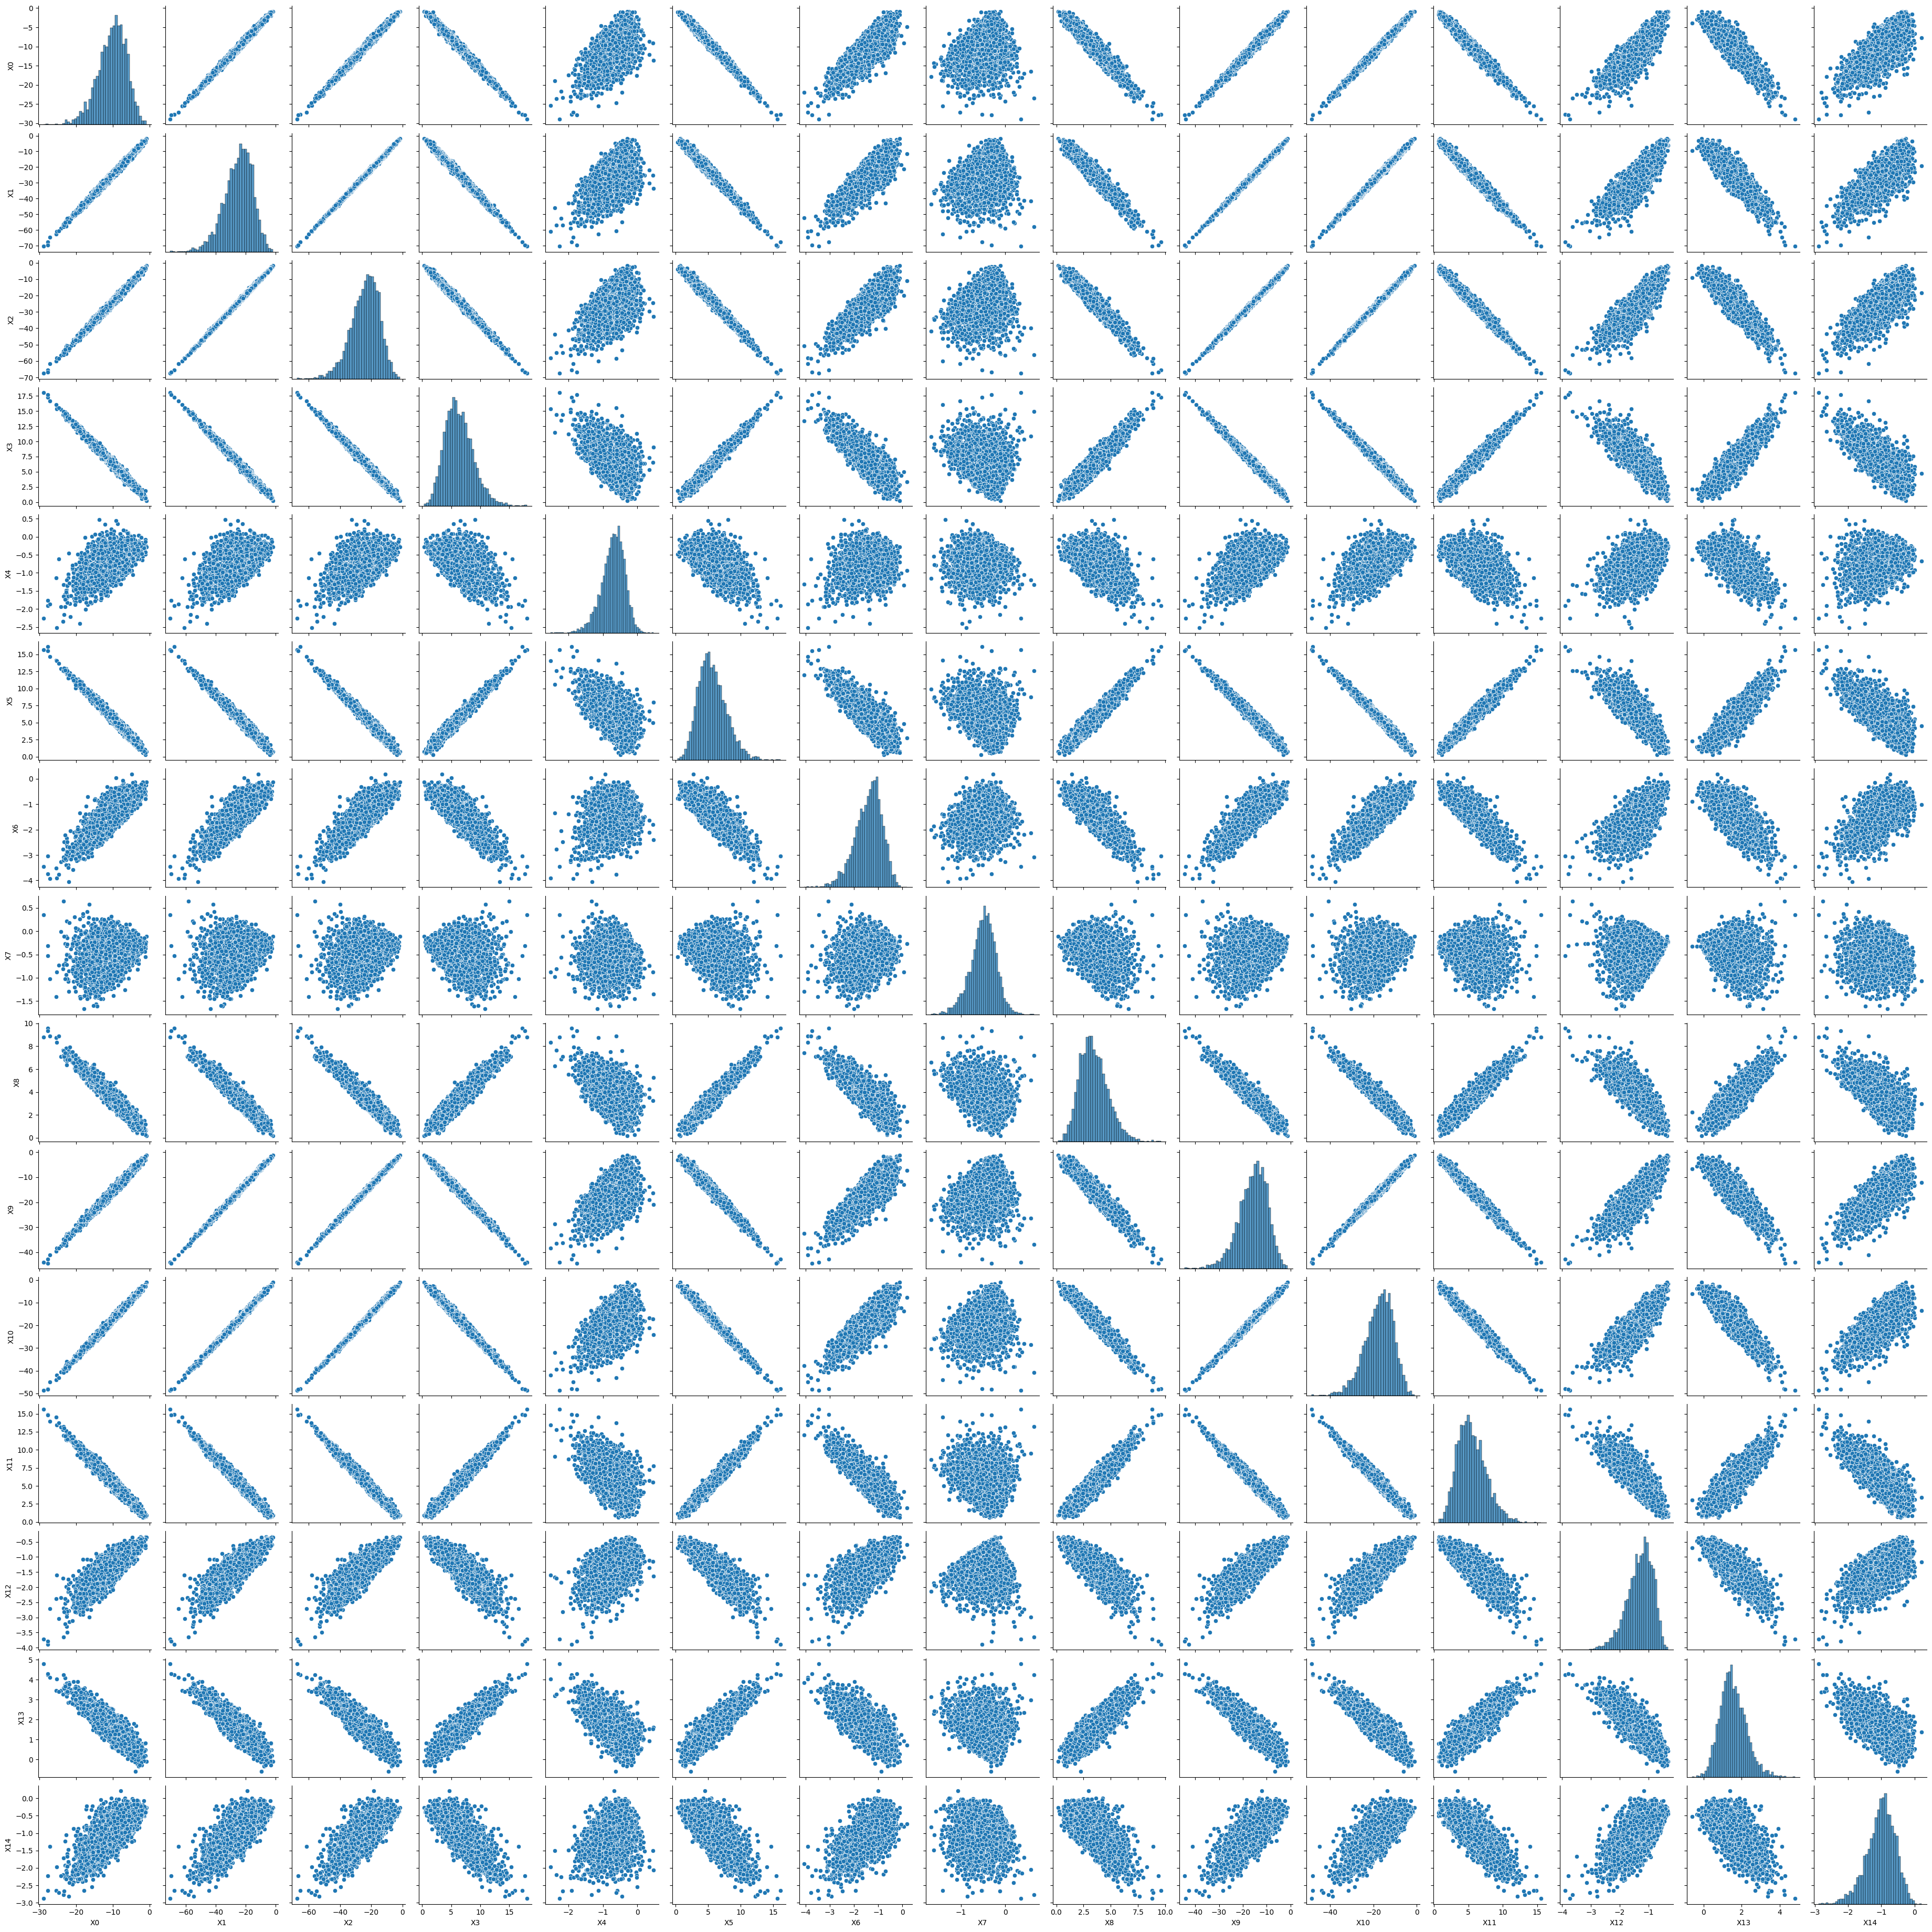

In [6]:
# plot the distribution of all variables against each other and save the plot as "pairplot.pdf"
import seaborn as sns
sns.pairplot(data)
plt.savefig(f"{dir_name}/pairplot.pdf")

In [7]:
################################## MISC ##################################

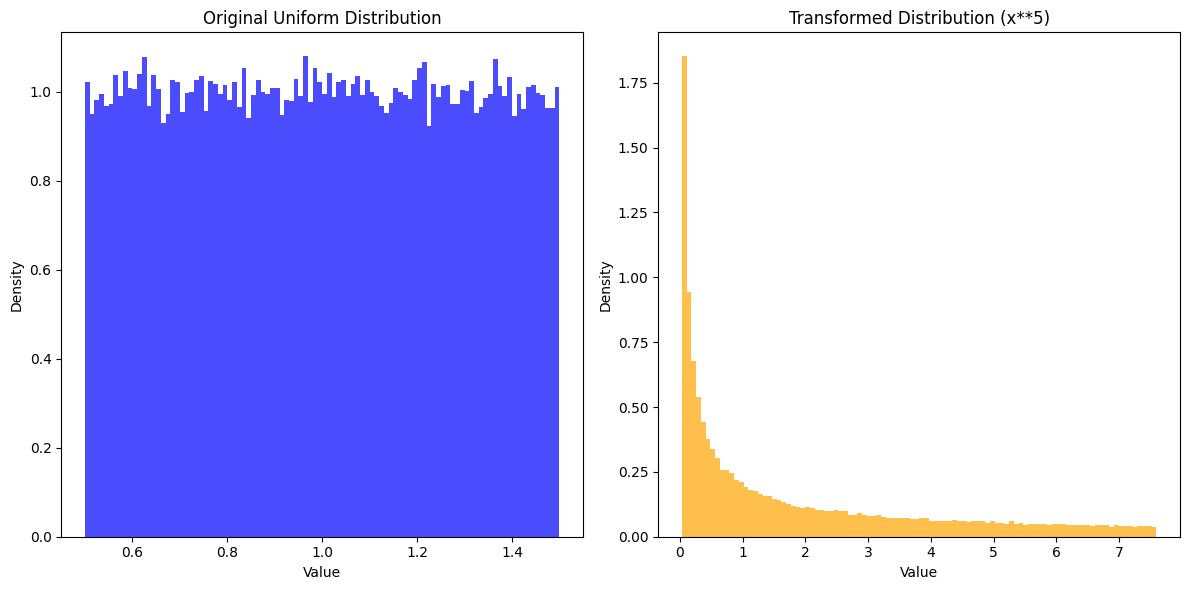

In [8]:
# Parameters for the uniform distribution
low, high = -1, 1  # Range of the uniform distribution
size = 100000  # Number of samples

# Generate uniform samples
uniform_samples = np.random.uniform(0.5, 1.5, size)

# Apply the power transformation
power = 5
transformed_samples = uniform_samples**power

# Plot the original and transformed distributions
plt.figure(figsize=(12, 6))

# Original uniform distribution
plt.subplot(1, 2, 1)
plt.hist(uniform_samples, bins=100, density=True, alpha=0.7, color='blue')
plt.title("Original Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

# Transformed distribution
plt.subplot(1, 2, 2)
plt.hist(transformed_samples, bins=100, density=True, alpha=0.7, color='orange')
plt.title(f"Transformed Distribution (x**{power})")
plt.xlabel("Value")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


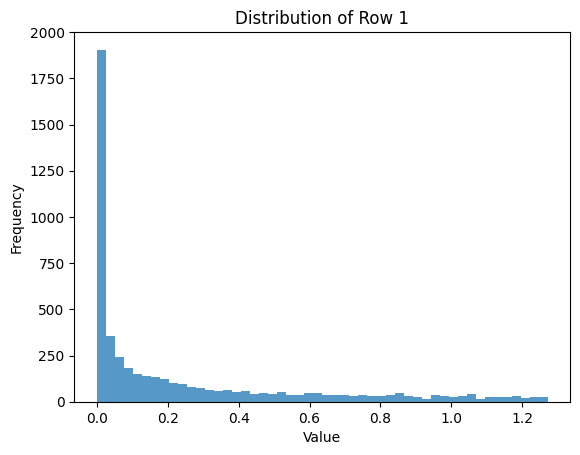

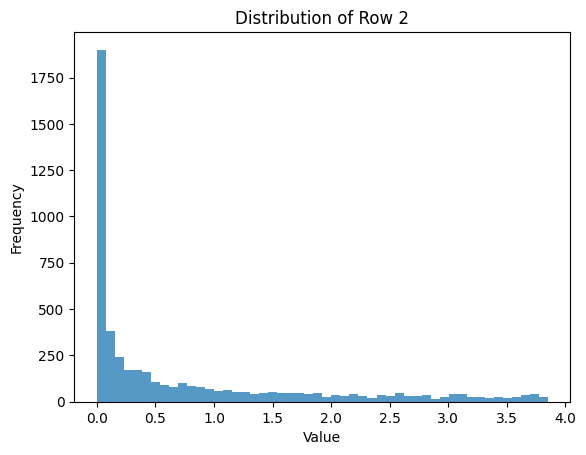

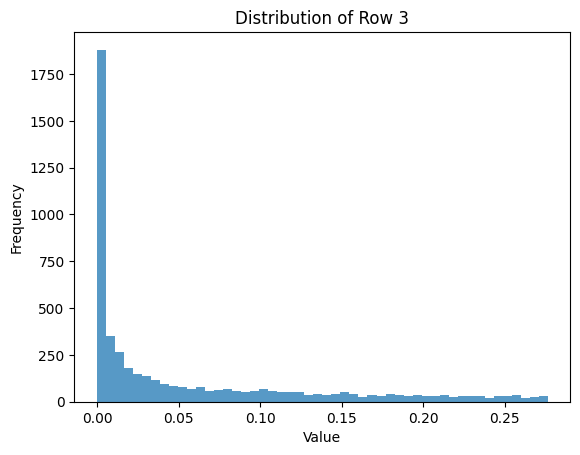

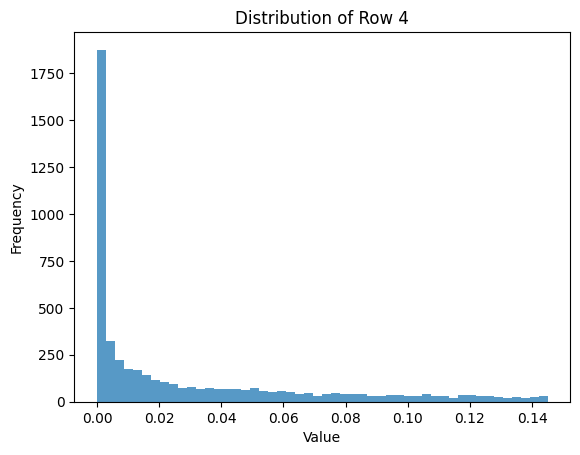

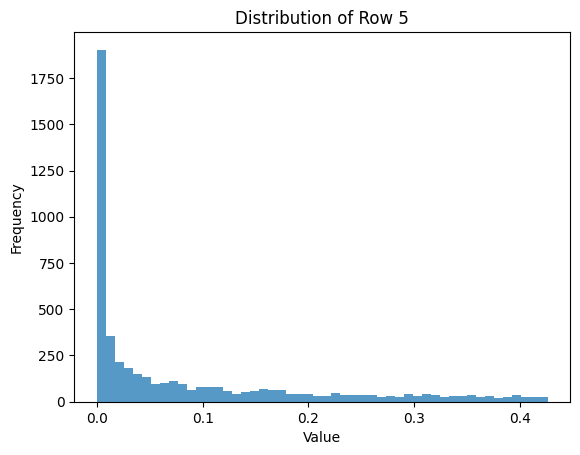

In [9]:
n_var = 5
noise_scales = np.random.uniform(0.5, 1.5, size=n_var)
noise = (np.random.uniform(-np.array(noise_scales).reshape(-1, 1), np.array(noise_scales).reshape(-1, 1), size=(n_var, 5000)).T)**4

# Plot histograms for each row
for i in range(n_var):
    plt.figure()
    plt.hist(noise[:, i], bins=50, alpha=0.75)
    plt.title(f'Distribution of Row {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [10]:
import os
import networkx as nx
# show cwd
print("cwd = ", os.getcwd())
from causal_metrics import cycle_f1

# Example graphs
B_true = nx.DiGraph([(0, 1), (1, 2), (2, 5), (5, 0)])
B_est = nx.DiGraph([(1, 0), (0, 5), (2, 1)])

# convert B_true and B_est to adjacency matrices in np.array format
B_true = nx.to_numpy_array(B_true)
B_est = nx.to_numpy_array(B_est)

# Compute cycle accuracy
try:
    f1_cycles = cycle_f1(B_true, B_est)
    print(f"F1 Cycles: {f1_cycles * 100:.2f}%")
except AssertionError as e:
    print(f"Error: {e}")


cwd =  /home/amine.mcharrak/pcax/examples
B_est is not cyclic. Returning 0 F1-score.
F1 Cycles: 0.00%


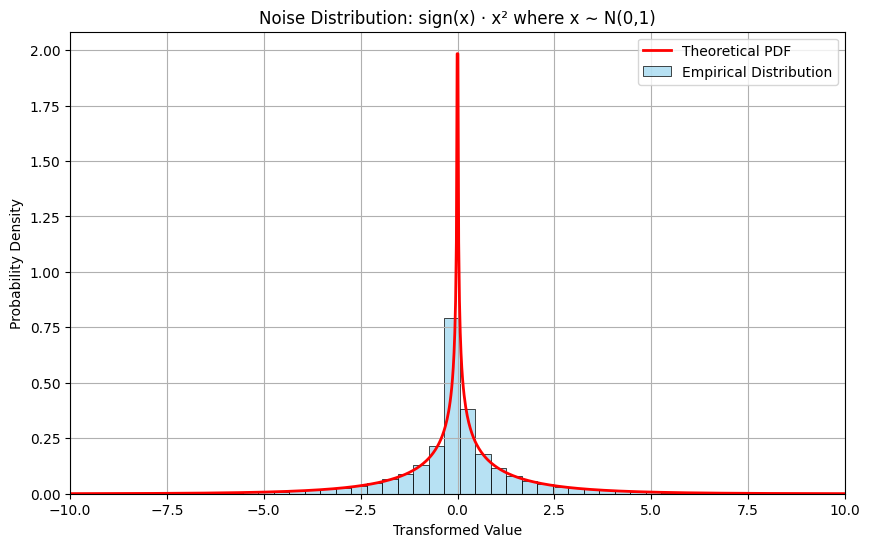

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate samples from transformed Gaussian distribution
np.random.seed(42)
x = np.random.normal(0, 1, 100000)  # Original Gaussian samples
y = np.sign(x) * (x ** 2)          # Apply transformation

# Theoretical PDF calculation
def theoretical_pdf(y):
    with np.errstate(divide='ignore', invalid='ignore'):
        pdf = 1 / (2 * np.sqrt(2 * np.pi * np.abs(y))) * np.exp(-np.abs(y)/2)
    return np.nan_to_num(pdf)

# Create visualization
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=100, stat='density', alpha=0.6, color='skyblue', label='Empirical Distribution')

# Plot theoretical distribution
x_range = np.linspace(-10, 10, 1000)
plt.plot(x_range, theoretical_pdf(x_range), 'r-', lw=2, label='Theoretical PDF')

plt.title('Noise Distribution: sign(x) · x² where x ∼ N(0,1)')
plt.xlabel('Transformed Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.xlim(-10, 10)  # Focus on central region
plt.show()